# ollama langchain

https://python.langchain.com/docs/integrations/chat/ollama/

# Installation

The LangChain Ollama integration lives in the langchain-ollama package




In [1]:
# python 获取系统变量 HOME 变量
import os
homePath = os.environ['HOME']
print("homePath: ",homePath)

# 修改成自己的 HOME 路径
basePath=homePath

print("basePath: ",basePath)

homePath:  /Users/tiankonguse
basePath:  /Users/tiankonguse


In [ ]:
%pip install -qU langchain-ollama

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Instantiation

from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="llama3.2",
    temperature=0,
    # other params...
)

In [3]:
# Invocation

from langchain_core.messages import AIMessage

messages = [
    (
        "system",
        "You are a helpful assistant that translates English to Chinese. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)

print(ai_msg.content)
# 我爱编程。


我爱编程。


In [4]:
# Chaining

from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful assistant that translates {input_language} to {output_language}. Translate the user sentence.",
        ),
        ("human", "{input}"),
    ]
)

chain = prompt | llm
chain.invoke(
    {
        "input_language": "English",
        "output_language": "Chinese",
        "input": "I love programming.",
    }
)


AIMessage(content='我爱编程。', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2025-03-03T16:31:42.365548Z', 'done': True, 'done_reason': 'stop', 'total_duration': 675836055, 'load_duration': 61155973, 'prompt_eval_count': 45, 'prompt_eval_duration': 113000000, 'eval_count': 6, 'eval_duration': 491000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-a2dfe7dc-b934-48d9-9793-7f6f7726fff4-0', usage_metadata={'input_tokens': 45, 'output_tokens': 6, 'total_tokens': 51})

In [5]:
# Tool calling

from typing import List

from langchain_core.tools import tool
from langchain_ollama import ChatOllama


@tool
def validate_user(user_id: int, addresses: List[str]) -> bool:
    """Validate user using historical addresses.

    Args:
        user_id (int): the user ID.
        addresses (List[str]): Previous addresses as a list of strings.
    """
    print(f"call Validating user {user_id} using addresses: {addresses}")
    return True


llm = ChatOllama(
    model="llama3.2",
    temperature=0,
).bind_tools([validate_user])

result = llm.invoke(
    "Could you validate user 123? They previously lived at "
    "123 Fake St in Boston MA and 234 Pretend Boulevard in "
    "Houston TX."
)
result.tool_calls

[{'name': 'validate_user',
  'args': {'addresses': ['123 Fake St', '234 Pretend Boulevard'],
   'user_id': 123},
  'id': 'c767bbae-f005-42fe-9125-6e02d6982add',
  'type': 'tool_call'}]

# Multi-modal



In [11]:
%pip install pillow

  Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.1 kB)
Using cached pillow-11.1.0-cp312-cp312-macosx_11_0_arm64.whl (3.1 MB)
Note: you may need to restart the kernel to use updated packages.



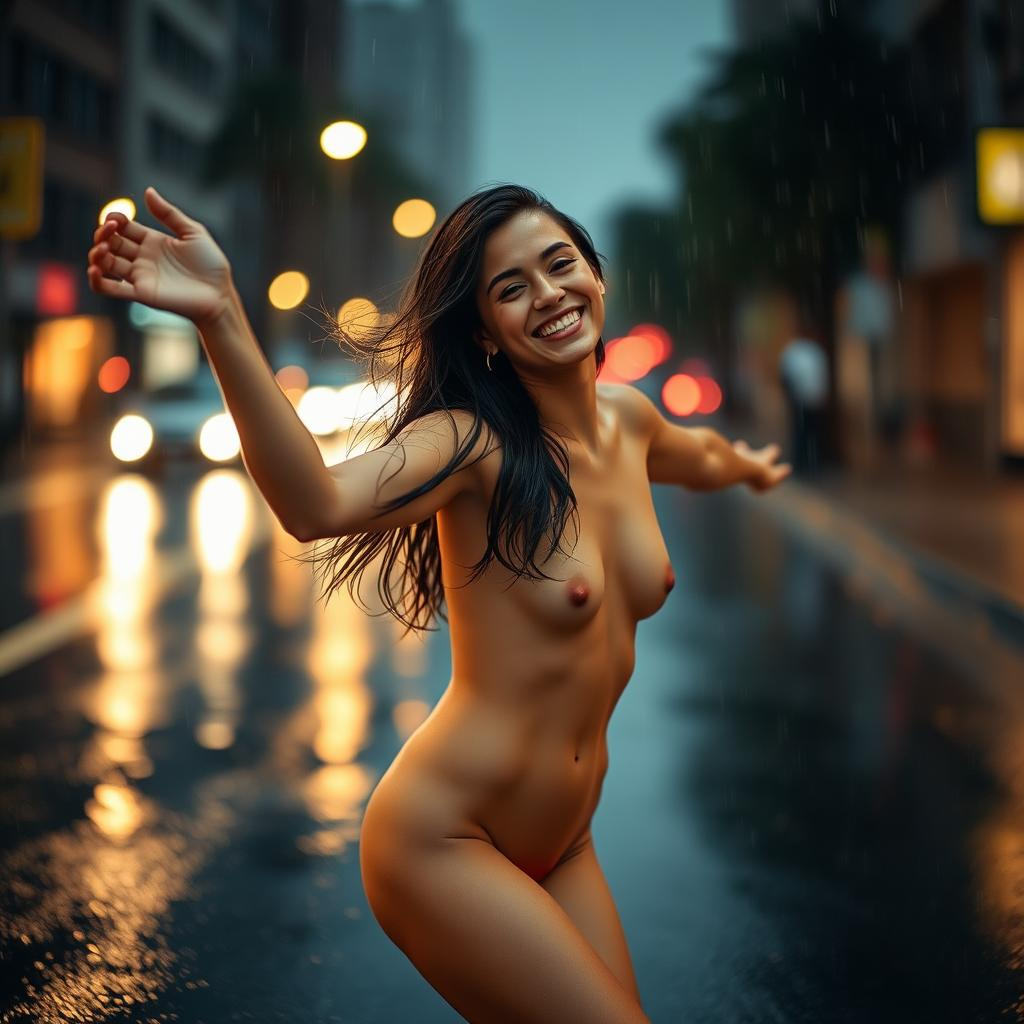

In [ ]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = basePath + '/project/github/ComfyUI/output/ComfyUI_00099_.png'
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [10]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

# llama3.2-vision
# llava
llm = ChatOllama(model="llama3.2-vision", temperature=0)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

# query_chain = chain.invoke(
#     {"text": "Is the person in the picture wearing clothes? How many people are there in the picture?", "image": image_b64}
# )
query_chain = chain.invoke(
    {"text": "图片的人穿衣服了吗? 图片上有几个人?", "image": image_b64}
)
print(query_chain)

这张照片是裸体的女性,但她在街道上走着,所以她的衣服可能会被吹飞。 
这张照片上只有一个人。
